In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
BLS_data_2017 = pd.read_csv("Historical_data_BLS_2017 .csv")
BLS_data_2018 = pd.read_csv("Historical_data_BLS_2018.csv")
set_2017_df = BLS_data_2017[["area_title","naics_title","occ_code","a_median","h_median","tot_emp","naics","o_group"]]
set_2018_df = BLS_data_2018[["area_title","naics_title","occ_code","a_median","h_median","tot_emp","naics","o_group"]]

In [3]:
set_2017_df=set_2017_df.loc[set_2017_df['o_group'] == 'total']
set_2018_df=set_2018_df.loc[set_2018_df['o_group'] == 'total']

In [4]:
set_2017_df=set_2017_df.loc[set_2017_df['area_title'] == 'U.S.']
set_2018_df=set_2018_df.loc[set_2018_df['area_title'] == 'U.S.']
set_2017_df.head()

,area_title,naics_title,occ_code,a_median,h_median,tot_emp,naics,o_group
0,U.S.,Cross-industry,00-0000,"37,690",18.12,"142,549,250",0,total
1382,U.S.,"Cross-industry, private ownership only",00-0000,"35,710",17.17,"120,851,270",1,total
2744,U.S.,"Agriculture, Forestry, Fishing and Hunting",00-0000,"24,480",11.77,"424,020",11,total
3061,U.S.,"Mining, Quarrying, and Oil and Gas Extraction",00-0000,"51,670",24.84,"591,130",21,total
3589,U.S.,Utilities,00-0000,"73,930",35.55,"552,270",22,total


In [5]:
combined_data = pd.merge(set_2017_df, set_2018_df, on="occ_code", suffixes=('_2017', '_2018'), how='inner')

In [6]:
combined_data["tot_emp_2018"] = combined_data["tot_emp_2018"].str.replace(',', '')  #remove comma in numbers
combined_data["tot_emp_2017"] = combined_data["tot_emp_2017"].str.replace(',', '')  #remove comma in numbers

In [7]:
combined_data["tot_emp_2018"] = combined_data["tot_emp_2018"].str.replace('*', '0')  #remove comma in numbers
combined_data["tot_emp_2017"] = combined_data["tot_emp_2017"].str.replace('*', '0')  #remove comma in numbers

In [ ]:
# checkfortext_df = combined_data.loc[combined_data['tot_emp_2018'].str.isdigit(), 'tot_emp_2018']
# checkfortext_df

In [9]:
combined_data["difference"] = combined_data["tot_emp_2018"].astype(float) - combined_data["tot_emp_2017"].astype(float)

In [10]:
combined_data["Percentage"] = round(combined_data["difference"].astype(float)/combined_data["tot_emp_2017"].astype(float),2).astype(float)

In [11]:
# checkfortext_df = combined_data.loc[~combined_data['Percentage'].str.isdigit(),'Percentage']
# checkfortext_df

In [12]:
combined_data=combined_data.loc[combined_data['naics_title_2017'] == combined_data['naics_title_2018']]
combined_data=combined_data.loc[combined_data['naics_2017'] == combined_data['naics_2018']]
combined_data.head()

,area_title_2017,naics_title_2017,occ_code,a_median_2017,h_median_2017,tot_emp_2017,naics_2017,o_group_2017,area_title_2018,naics_title_2018,a_median_2018,h_median_2018,tot_emp_2018,naics_2018,o_group_2018,difference,Percentage
5321,U.S.,Management of Companies and Enterprises,00-0000,"66,680",32.06,2326030,55,total,U.S.,Management of Companies and Enterprises,"69,020",33.18,2372520,55,total,46490.0,0.02
5780,U.S.,Administrative and Support and Waste Managemen...,00-0000,"29,710",14.28,9108260,56,total,U.S.,Administrative and Support and Waste Managemen...,"30,860",14.84,9265630,56,total,157370.0,0.02
6255,U.S.,Educational Services,00-0000,"47,600",22.88,13042580,61,total,U.S.,Educational Services,"48,840",23.48,13149990,61,total,107410.0,0.01
6740,U.S.,Health Care and Social Assistance,00-0000,"37,780",18.16,20208050,62,total,U.S.,Health Care and Social Assistance,"38,610",18.56,20621190,62,total,413140.0,0.02
7240,U.S.,"Arts, Entertainment, and Recreation",00-0000,"26,340",12.66,2370160,71,total,U.S.,"Arts, Entertainment, and Recreation","27,440",13.19,2422590,71,total,52430.0,0.02


In [13]:
combined_data["Percentage"]=combined_data["Percentage"].astype(float)
combined_data.head()

,area_title_2017,naics_title_2017,occ_code,a_median_2017,h_median_2017,tot_emp_2017,naics_2017,o_group_2017,area_title_2018,naics_title_2018,a_median_2018,h_median_2018,tot_emp_2018,naics_2018,o_group_2018,difference,Percentage
5321,U.S.,Management of Companies and Enterprises,00-0000,"66,680",32.06,2326030,55,total,U.S.,Management of Companies and Enterprises,"69,020",33.18,2372520,55,total,46490.0,0.02
5780,U.S.,Administrative and Support and Waste Managemen...,00-0000,"29,710",14.28,9108260,56,total,U.S.,Administrative and Support and Waste Managemen...,"30,860",14.84,9265630,56,total,157370.0,0.02
6255,U.S.,Educational Services,00-0000,"47,600",22.88,13042580,61,total,U.S.,Educational Services,"48,840",23.48,13149990,61,total,107410.0,0.01
6740,U.S.,Health Care and Social Assistance,00-0000,"37,780",18.16,20208050,62,total,U.S.,Health Care and Social Assistance,"38,610",18.56,20621190,62,total,413140.0,0.02
7240,U.S.,"Arts, Entertainment, and Recreation",00-0000,"26,340",12.66,2370160,71,total,U.S.,"Arts, Entertainment, and Recreation","27,440",13.19,2422590,71,total,52430.0,0.02


In [14]:
combined_data=combined_data.sort_values(by='Percentage',ascending=False)
combined_data.head()

,area_title_2017,naics_title_2017,occ_code,a_median_2017,h_median_2017,tot_emp_2017,naics_2017,o_group_2017,area_title_2018,naics_title_2018,a_median_2018,h_median_2018,tot_emp_2018,naics_2018,o_group_2018,difference,Percentage
147620,U.S.,Elementary and Secondary Schools,00-0000,"48,500",23.32,67180,611100,total,U.S.,Elementary and Secondary Schools,"46,750",22.47,8547160,611100,total,8479980.0,126.23
147622,U.S.,Elementary and Secondary Schools,00-0000,"48,500",23.32,67180,611100,total,U.S.,Elementary and Secondary Schools,"47,120",22.65,7623010,611100,total,7555830.0,112.47
155390,U.S.,Other Schools and Instruction,00-0000,"38,180",18.36,5380,611600,total,U.S.,Other Schools and Instruction,"36,390",17.49,447670,611600,total,442290.0,82.21
155391,U.S.,Other Schools and Instruction,00-0000,"38,180",18.36,5380,611600,total,U.S.,Other Schools and Instruction,"36,360",17.48,441400,611600,total,436020.0,81.04
150820,U.S.,"Colleges, Universities, and Professional Schools",00-0000,"63,110",30.34,66900,611300,total,U.S.,"Colleges, Universities, and Professional Schools","56,330",27.08,3045050,611300,total,2978150.0,44.52


In [15]:
combined_data=combined_data.loc[combined_data['Percentage'] <= 100000000]
combined_data.head(50)

,area_title_2017,naics_title_2017,occ_code,a_median_2017,h_median_2017,tot_emp_2017,naics_2017,o_group_2017,area_title_2018,naics_title_2018,a_median_2018,h_median_2018,tot_emp_2018,naics_2018,o_group_2018,difference,Percentage
147620,U.S.,Elementary and Secondary Schools,00-0000,"48,500",23.32,67180,611100,total,U.S.,Elementary and Secondary Schools,"46,750",22.47,8547160,611100,total,8479980.0,126.23
147622,U.S.,Elementary and Secondary Schools,00-0000,"48,500",23.32,67180,611100,total,U.S.,Elementary and Secondary Schools,"47,120",22.65,7623010,611100,total,7555830.0,112.47
155390,U.S.,Other Schools and Instruction,00-0000,"38,180",18.36,5380,611600,total,U.S.,Other Schools and Instruction,"36,390",17.49,447670,611600,total,442290.0,82.21
155391,U.S.,Other Schools and Instruction,00-0000,"38,180",18.36,5380,611600,total,U.S.,Other Schools and Instruction,"36,360",17.48,441400,611600,total,436020.0,81.04
150820,U.S.,"Colleges, Universities, and Professional Schools",00-0000,"63,110",30.34,66900,611300,total,U.S.,"Colleges, Universities, and Professional Schools","56,330",27.08,3045050,611300,total,2978150.0,44.52
167729,U.S.,General Medical and Surgical Hospitals,00-0000,"58,580",28.16,212890,622100,total,U.S.,General Medical and Surgical Hospitals,"57,180",27.49,5546980,622100,total,5334090.0,25.06
150823,U.S.,"Colleges, Universities, and Professional Schools",00-0000,"63,110",30.34,66900,611300,total,U.S.,"Colleges, Universities, and Professional Schools","54,160",26.04,1708300,611300,total,1641400.0,24.54
148536,U.S.,Junior Colleges,00-0000,"48,990",23.55,28390,611200,total,U.S.,Junior Colleges,"54,350",26.13,721180,611200,total,692790.0,24.40
167730,U.S.,General Medical and Surgical Hospitals,00-0000,"58,580",28.16,212890,622100,total,U.S.,General Medical and Surgical Hospitals,"57,600",27.69,4668670,622100,total,4455780.0,20.93
150821,U.S.,"Colleges, Universities, and Professional Schools",00-0000,"63,110",30.34,66900,611300,total,U.S.,"Colleges, Universities, and Professional Schools","58,770",28.26,1269520,611300,total,1202620.0,17.98


In [16]:
combined_data=combined_data.loc[combined_data['tot_emp_2017'].astype(float) >= 10000]
combined_data=combined_data.loc[combined_data['tot_emp_2018'].astype(float) >= 10000]

In [17]:
combined_data.head(50)

,area_title_2017,naics_title_2017,occ_code,a_median_2017,h_median_2017,tot_emp_2017,naics_2017,o_group_2017,area_title_2018,naics_title_2018,a_median_2018,h_median_2018,tot_emp_2018,naics_2018,o_group_2018,difference,Percentage
147620,U.S.,Elementary and Secondary Schools,00-0000,"48,500",23.32,67180,611100,total,U.S.,Elementary and Secondary Schools,"46,750",22.47,8547160,611100,total,8479980.0,126.23
147622,U.S.,Elementary and Secondary Schools,00-0000,"48,500",23.32,67180,611100,total,U.S.,Elementary and Secondary Schools,"47,120",22.65,7623010,611100,total,7555830.0,112.47
150820,U.S.,"Colleges, Universities, and Professional Schools",00-0000,"63,110",30.34,66900,611300,total,U.S.,"Colleges, Universities, and Professional Schools","56,330",27.08,3045050,611300,total,2978150.0,44.52
167729,U.S.,General Medical and Surgical Hospitals,00-0000,"58,580",28.16,212890,622100,total,U.S.,General Medical and Surgical Hospitals,"57,180",27.49,5546980,622100,total,5334090.0,25.06
150823,U.S.,"Colleges, Universities, and Professional Schools",00-0000,"63,110",30.34,66900,611300,total,U.S.,"Colleges, Universities, and Professional Schools","54,160",26.04,1708300,611300,total,1641400.0,24.54
148536,U.S.,Junior Colleges,00-0000,"48,990",23.55,28390,611200,total,U.S.,Junior Colleges,"54,350",26.13,721180,611200,total,692790.0,24.40
167730,U.S.,General Medical and Surgical Hospitals,00-0000,"58,580",28.16,212890,622100,total,U.S.,General Medical and Surgical Hospitals,"57,600",27.69,4668670,622100,total,4455780.0,20.93
150821,U.S.,"Colleges, Universities, and Professional Schools",00-0000,"63,110",30.34,66900,611300,total,U.S.,"Colleges, Universities, and Professional Schools","58,770",28.26,1269520,611300,total,1202620.0,17.98
148538,U.S.,Junior Colleges,00-0000,"48,990",23.55,28390,611200,total,U.S.,Junior Colleges,"58,030",27.9,492640,611200,total,464250.0,16.35
165901,U.S.,Hospitals,00-0000,"53,820",25.88,364660,622000,total,U.S.,Hospitals,"56,770",27.29,6049990,622000,total,5685330.0,15.59


In [18]:
combined_data["a_median_2018"] = combined_data["a_median_2018"].str.replace(',', '')  #remove comma in numbers
combined_data["a_median_2017"] = combined_data["a_median_2017"].str.replace(',', '')  #remove comma in numbers

In [19]:
combined_data["a_median_2018"] = combined_data["a_median_2018"].str.replace('*', '0')  #remove comma in numbers
combined_data["a_median_2017"] = combined_data["a_median_2017"].str.replace('*', '0')  #remove comma in numbers

In [20]:
combined_data["a_median_2018"] = combined_data["a_median_2018"].str.replace('#', '0')  #remove comma in numbers
combined_data["a_median_2017"] = combined_data["a_median_2017"].str.replace('#', '0')  #remove comma in numbers

In [21]:
combined_data["pay_difference"] = combined_data["a_median_2017"].astype(float) - combined_data["a_median_2018"].astype(float)

In [22]:
combined_data["PayDifferencePercentage"] = round(combined_data["pay_difference"].astype(float)/combined_data["a_median_2017"].astype(float),2).astype(float)
combined_data.head(50)

,area_title_2017,naics_title_2017,occ_code,a_median_2017,h_median_2017,tot_emp_2017,naics_2017,o_group_2017,area_title_2018,naics_title_2018,a_median_2018,h_median_2018,tot_emp_2018,naics_2018,o_group_2018,difference,Percentage,pay_difference,PayDifferencePercentage
147620,U.S.,Elementary and Secondary Schools,00-0000,48500,23.32,67180,611100,total,U.S.,Elementary and Secondary Schools,46750,22.47,8547160,611100,total,8479980.0,126.23,1750.0,0.04
147622,U.S.,Elementary and Secondary Schools,00-0000,48500,23.32,67180,611100,total,U.S.,Elementary and Secondary Schools,47120,22.65,7623010,611100,total,7555830.0,112.47,1380.0,0.03
150820,U.S.,"Colleges, Universities, and Professional Schools",00-0000,63110,30.34,66900,611300,total,U.S.,"Colleges, Universities, and Professional Schools",56330,27.08,3045050,611300,total,2978150.0,44.52,6780.0,0.11
167729,U.S.,General Medical and Surgical Hospitals,00-0000,58580,28.16,212890,622100,total,U.S.,General Medical and Surgical Hospitals,57180,27.49,5546980,622100,total,5334090.0,25.06,1400.0,0.02
150823,U.S.,"Colleges, Universities, and Professional Schools",00-0000,63110,30.34,66900,611300,total,U.S.,"Colleges, Universities, and Professional Schools",54160,26.04,1708300,611300,total,1641400.0,24.54,8950.0,0.14
148536,U.S.,Junior Colleges,00-0000,48990,23.55,28390,611200,total,U.S.,Junior Colleges,54350,26.13,721180,611200,total,692790.0,24.40,-5360.0,-0.11
167730,U.S.,General Medical and Surgical Hospitals,00-0000,58580,28.16,212890,622100,total,U.S.,General Medical and Surgical Hospitals,57600,27.69,4668670,622100,total,4455780.0,20.93,980.0,0.02
150821,U.S.,"Colleges, Universities, and Professional Schools",00-0000,63110,30.34,66900,611300,total,U.S.,"Colleges, Universities, and Professional Schools",58770,28.26,1269520,611300,total,1202620.0,17.98,4340.0,0.07
148538,U.S.,Junior Colleges,00-0000,48990,23.55,28390,611200,total,U.S.,Junior Colleges,58030,27.9,492640,611200,total,464250.0,16.35,-9040.0,-0.18
165901,U.S.,Hospitals,00-0000,53820,25.88,364660,622000,total,U.S.,Hospitals,56770,27.29,6049990,622000,total,5685330.0,15.59,-2950.0,-0.05


In [23]:
# combined_data.sort_values[by='PayDifferencePercentage'].head(50)

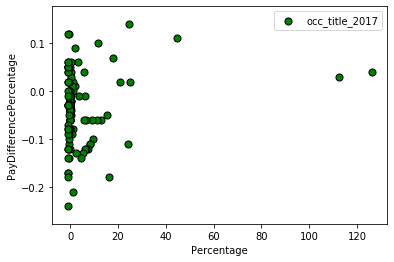

In [40]:
hello = combined_data.plot.scatter(x='Percentage', y='PayDifferencePercentage',label='occ_title_2017',s=50,marker="o",edgecolors="black",color="green")

#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x,p(x),"r--")

In [67]:
extract.sort_values("pay_difference", ascending=False, inplace=True)
extract=combined_data[["pay_difference","naics_title_2018"]]
extract.head(5)
#plt.figure(figsize=(100, 100))
#plt.bar( extract["pay_difference"] , extract["naics_title_2018"], color = "blue")


,pay_difference,naics_title_2018
150823,8950.0,"Colleges, Universities, and Professional Schools"
150820,6780.0,"Colleges, Universities, and Professional Schools"
148995,6520.0,Junior Colleges
148993,6510.0,Junior Colleges
167731,5440.0,General Medical and Surgical Hospitals
